# Natural Language Processing with Classification and Vector Spaces

Notas sobre o curso Natural Language Processing with Classification and Vector Spaces da DeeplearninigAI.

Repositório com a trilha Natural Language Processing:
https://github.com/k3ybladewielder/nlp

# Objetivos de aprendizagem
- Sentiment analysis
- Logistic regression
- Data pre-processing
- Calculating word frequencies
- Feature extraction
- Vocabulary creation
- Supervised learning

# Week 1 - Sentiment Analysis With Logistic Regression

## Supervised ML and Sentiment Analysis

Os algoritmos de **Machine Learning (ML)** supervisionados são um tipo de algoritmo que aprende a partir de dados rotulados, ou seja, dados que já possuem um rótulo ou uma classificação pré-definida. Esses algoritmos usam esses dados rotulados para aprender a fazer previsões ou classificações em novos dados.

Na área de Processamento de Linguagem Natural (NLP), os algoritmos de ML supervisionados são usados para uma variedade de tarefas, como classificação de sentimentos, identificação de entidades nomeadas, análise de tópicos, tradução automática, entre outras.

Um exemplo de como esses algoritmos são usados em NLP é na classificação de sentimentos em textos. Nesse caso, um modelo de ML supervisionado seria **treinado em um conjunto de dados rotulados** que contém textos e suas respectivas classificações de sentimento (por exemplo, positivo, negativo ou neutro). O algoritmo usaria esses dados para **aprender a reconhecer padrões nos textos** e, em seguida, aplicaria esses padrões para **classificar o sentimento em novos textos**.

Outro exemplo é na identificação de **entidades nomeadas (NER)**, que é uma tarefa que envolve a identificação de nomes de pessoas, locais, organizações e outras entidades em um texto. Nesse caso, um modelo de ML supervisionado seria treinado em um conjunto de dados rotulados que contém textos e suas respectivas entidades nomeadas. O algoritmo usaria esses dados para aprender a reconhecer os padrões de palavras e contextos que indicam a presença de uma entidade nomeada em um texto, e, em seguida, aplicaria esses padrões para identificar entidades em novos textos.

Em resumo, os algoritmos de ML supervisionados são uma técnica poderosa para resolver problemas em NLP, permitindo que modelos aprendam com dados rotulados e possam fazer previsões ou classificações em novos dados com base no que foi aprendido.

<img src="./imgs/supervised_ml.png">

Um pipeline básico para a _task_ de análise de sentimento (classificação) geralmente envolve as etapas de:
- **Pré-processamento de texto**: Esta etapa envolve a limpeza e preparação dos dados. O texto é normalmente convertido em minúsculas, removidos caracteres especiais, removidos números e pontuações, e realizada a tokenização do texto para obter as palavras individuais.
- **Criação de features**: Nesta etapa, são criadas as features que serão usadas pelo modelo de classificação. As features podem incluir a contagem de palavras, a frequência de palavras, o tipo de palavras, o uso de negação, entre outras.
- **Treinamento do modelo**: O modelo de classificação é treinado em um conjunto de dados rotulados que contêm exemplos de texto e suas respectivas classificações de sentimento. Existem vários algoritmos de aprendizado de máquina que podem ser usados para treinar um modelo, como Árvores de Decisão, Naive Bayes, Regressão Logística, SVM, Redes Neurais, etc.
- **Avaliação do modelo**: Após o treinamento, o modelo é avaliado em um conjunto de dados de teste para verificar sua precisão. É comum dividir o conjunto de dados em conjunto de treinamento, validação e teste.
- **Implantação**: Finalmente, o modelo treinado é usado para classificar o sentimento de novos textos. Novos textos passam pelas mesmas etapas de pré-processamento e criação de features, e o modelo treinado é usado para prever a classificação de sentimento do texto.

## Vocabulary and Feature Extraction

Para representar textos de forma numérica, primeiro precisamos construir um vocabulário, com eles poderemos _encodar_ qualquer texto como um array de números. Um Vocabulário é uma lista com palavras únicas, não repetidas.

Uma forma simples de extrair features do texto é usando o vocabulário, verificando cada palavra do vocabulário que aparece no texto. Caso as palavras no texto que estamos extraindo a feature tenham apareca no vocabulário, atribuímos o valor 1 para ela, e zero para as palavras que do vocabulário que não aparecem no texto. Assim, estamos representando o texto usando [**one-hot encoding**](https://k3ybladewielder.medium.com/introdu%C3%A7%C3%A3o-%C3%A0-nlp-4d7d98b9a36a) ou representação esparsa. Mas esse método pode ser problemático porquê o número de features é igual ao número de palavras no vocabulário e a grande maioria das features serão zero, aumentando excessivamente o tempo de treino e predição dos modelos.

<img src="./imgs/vocab.png">

Existem diversas técnicas para representar textos como vetores, sendo as mais comuns a Bag of Words (BoW) e a Representação Distribuída de Palavras (Word Embeddings). Vou explicar brevemente cada uma delas:
- **Bag of Words (BoW)**: Nessa técnica, o texto é representado como um vetor contendo a contagem de ocorrências de cada palavra presente no texto. Cada palavra é considerada como uma dimensão do vetor. Dessa forma, quanto mais vezes uma palavra aparecer no texto, maior será o valor correspondente na dimensão correspondente no vetor. Por exemplo, se um texto contém as palavras "gato", "cão" e "casa", a representação BoW seria um vetor com três dimensões, com valores correspondentes à contagem de ocorrências de cada palavra no texto.
- **Word Embeddings**: Essa técnica é baseada em modelos de linguagem neural, que mapeiam cada palavra em um espaço vetorial de alta dimensão, onde palavras semelhantes têm representações próximas. A ideia é que cada palavra seja representada por um vetor de números reais que captura seu significado semântico. Esses vetores podem ser aprendidos a partir de grandes quantidades de textos usando técnicas de aprendizado de máquina, como Word2Vec, GloVe ou FastText. Os vetores resultantes podem ser usados para representar cada palavra em um texto como um vetor numérico. A representação distribuída de palavras pode capturar relações semânticas entre palavras, como sinonímia e antonímia, e pode ser usada para tarefas mais complexas, como análise de sentimento ou classificação de texto.

Ambas as técnicas são amplamente utilizadas em NLP, dependendo do objetivo e do contexto da tarefa em questão. A escolha da técnica de representação de texto pode influenciar significativamente o desempenho do modelo de aprendizado de máquina, e é importante escolher a técnica mais adequada para a tarefa específica.

Tanto a técnica de Bag of Words (BoW) quanto a Word Embeddings têm seus **pontos fortes e fracos**, e a escolha de qual usar depende do contexto e do objetivo da tarefa em questão.

A representação **BoW** pode ser uma escolha adequada para **tarefas simples de classificação de texto**, como classificação de spam ou análise de sentimento, onde a presença ou ausência de palavras específicas pode ser um indicador importante para a classificação. Além disso, a representação **BoW é computacionalmente eficiente e fácil de interpretar**, o que pode ser uma vantagem para problemas onde a transparência do modelo é importante. No entanto, a representação **BoW não leva em consideração a ordem das palavras no texto, o que pode limitar sua capacidade de capturar nuances semânticas.**

Já Word Embedding é mais adequada para **tarefas que envolvem análise semântica**, como tradução automática, classificação de tópicos ou análise de sentimento baseada em frases complexas. A representação Word Embedding **leva em consideração a ordem e o contexto das palavras**, e **pode capturar a similaridade semântica entre palavras que não aparecem juntas com frequência**. Além disso, a representação distribuída de palavras **pode ser usada para inicializar redes neurais em tarefas de aprendizado profundo**, melhorando o desempenho do modelo. No entanto, Word Embedding **pode ser computacionalmente intensiva e requer grandes quantidades de dados de treinamento para obter bons resultados**.

## Negative and Positive Frequencies

Numa task de classificação de sentimentos, podemos identificar as palavras positivas e negativas a partir da frequencia de ocorrencia em que elas ocorrem nos textos positivos e negativos. Usando essa contagem, podemos extrair features e usá-las no modelo de classificação, como a **regressão logística**. 

<img src="./imgs/tweet_corpus.png">

A partir da contagem da frequencia das palavras em cada classe, chegamos a essa tabela. Na prática, essa tabela será um dicionário que mapeia a classe da palavra e sua frequência de ocorrência.

<img src="./imgs/word_freq_tweets.png">

Podemos representar essa tabela de frequencia com um array com 3 features, aumentando a velocidade na implementação, porquê em vez de termos v features, teremos apenas 3 para que o modelo aprenda. 

Aqui, a primeira feature é um bias, depois o somatório das palavras da label positiva e o somatório das palavras da label negativa. Assim, teremos o novo vetor com 3 features.

<img src="./imgs/vector_3.png">

<img src="./imgs/feature_extraction.png">

## Feature Extraction with Frequencies

## Preprocessing

O pré-processamento geralmente envolve as etapas de limpeza e preparação dos dados. O texto é normalmente convertido em minúsculas, removidos caracteres especiais, removidos números e pontuações, e realizada a tokenização do texto para obter as palavras individuais.

Exemplo em python:

In [1]:
import nltk
from nltk.corpus import stopwords
import string

nltk.download('stopwords')

def text_cleaning(text):
    # Extrai as stopwords em português
    stopwords_list = stopwords.words('portuguese')
    
    # Remove caracteres especiais
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove números e minimiza
    text = ''.join(word for word in text if not word.isdigit()).lower()
    
    # Converte para minúsculo e tokeniza as palavras
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove as stopwords
    tokens = [word for word in tokens if word not in stopwords_list]
    
    return tokens

# Exemplo de uso
text = "Este é um exemplo de texto que será limpo e tokenizado!"
tokens = text_cleaning(text)
print(tokens)

['exemplo', 'texto', 'limpo', 'tokenizado']


[nltk_data] Downloading package stopwords to /home/joaoag/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mas além disso também podemos fazer **Stemming** e **lematização**. Elas são técnicas de pré-processamento de texto com o objetivo de reduzir as palavras em sua forma base ou raiz, simplificando o processo de análise de texto.

**Stemming** é um processo mais simples e rápido de normalização de palavras, que envolve a remoção de sufixos com o objetivo de transformar uma palavra em sua raiz, ou seja, em sua forma básica. Um exemplo de algoritmo de stemming é o Porter Stemmer, que é amplamente utilizado em NLP. O ponto positivo do stemming é sua simplicidade e velocidade de processamento, o que pode ser útil em projetos com grandes volumes de dados. No entanto, o stemming pode produzir algumas palavras raiz que não são facilmente reconhecidas, o que pode ser um problema em alguns casos.

Já a **lematização** é um processo mais complexo de normalização de palavras, que envolve a análise do contexto da palavra para determinar sua forma básica. A lematização utiliza um dicionário de palavras ou um algoritmo para mapear a palavra para sua forma base. O ponto positivo da lematização é que ela produz palavras que são facilmente reconhecíveis, o que pode ser importante em projetos que exigem maior precisão na análise de texto. No entanto, a lematização é um processo mais lento e computacionalmente mais caro do que o stemming, o que pode ser um problema em projetos com grandes volumes de dados.

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string

def text_cleaning_s(text):
    # Extrai as stopwords em português
    stopwords_list = stopwords.words('portuguese')
    
    # Remove caracteres especiais
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove números e minimiza
    text = ''.join(word for word in text if not word.isdigit()).lower()
    
    # Converte para minúsculo e tokeniza as palavras
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove as stopwords
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Realiza o stemming dos tokens
    stemmer = SnowballStemmer('portuguese')
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    return stemmed_tokens

# Exemplo de uso
text = "Este é um exemplo de texto que será limpo, tokenizado e stemmed!"
tokens = text_cleaning_s(text)
print(tokens)

['exempl', 'text', 'limp', 'tokeniz', 'stemmed']


In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

nltk.download('wordnet')
nltk.download('omw-1.4')

def text_cleaning_l(text):
    # Extrai as stopwords em inglês
    stopwords_list = stopwords.words('english')
    
    # Remove caracteres especiais
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove números e minimiza
    text = ''.join(word for word in text if not word.isdigit()).lower()
    
    # Converte para minúsculo e tokeniza as palavras
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove as stopwords
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Realiza a lematização dos tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized_tokens

# Exemplo de uso
text = "This is an example of text that will be cleaned, tokenized, and lemmatized!"
tokens = text_cleaning_l(text)
print(tokens)

[nltk_data] Downloading package wordnet to /home/joaoag/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/joaoag/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


['example', 'text', 'cleaned', 'tokenized', 'lemmatized']


## Logistic Regression Overview

A **regressão logística** é frequentemente utilizada em análise de sentimento porque é um algoritmo de classificação simples, rápido e eficiente para problemas de classificação binária, ou seja, quando há apenas duas classes, como positivo e negativo. Além disso, a regressão logística é facilmente interpretável, o que significa que é possível entender como o modelo chegou a uma determinada previsão.

Outra vantagem da regressão logística é que ela lida bem com problemas de dados desbalanceados, que é comum em análise de sentimento, onde muitas vezes há mais exemplos de uma classe do que outra. A regressão logística usa uma função sigmoide para calcular as probabilidades de cada classe, e essa função é bem adequada para casos de classes desbalanceadas.

Outro motivo para a popularidade da regressão logística em análise de sentimento é que ela é relativamente fácil de implementar e ajustar. É possível utilizar diferentes técnicas de regularização, como a regularização L1 ou L2, para evitar overfitting e melhorar o desempenho do modelo.

No entanto, é importante ressaltar que a regressão logística pode não ser adequada para problemas de classificação multiclasse, ou seja, quando há mais de duas classes, como em análise de tópicos. Nesses casos, outros algoritmos, como Árvores de Decisão, SVMs ou Redes Neurais, podem ser mais apropriados.

<img src="./imgs/logistic_regression.png">

O modelo é treinado usando um conjunto de dados rotulados, onde cada texto é rotulado como tendo um sentimento positivo ou negativo. O objetivo do treinamento é ajustar os parâmetros do modelo para que ele possa fazer previsões precisas em novos dados.

Durante o treinamento, o modelo utiliza a função logística para calcular a probabilidade de um texto ter um sentimento positivo ou negativo com base em seus vetores de características. A função logística produz um valor entre 0 e 1, que representa a probabilidade de um texto ter um sentimento positivo. Se a probabilidade for maior que 0,5, o modelo classifica o texto como tendo um sentimento positivo. Caso contrário, o texto é classificado como tendo um sentimento negativo.

Após o treinamento, o modelo pode ser usado para fazer previsões em novos dados. Para cada novo texto, o modelo converte-o em um vetor de características e utiliza a função logística para calcular a probabilidade de ter um sentimento positivo ou negativo. Em seguida, classifica o texto como tendo um sentimento positivo ou negativo com base no valor calculado.

In [4]:
def text_cleaning_l(text):
    # Extrai as stopwords
    stopwords_list = stopwords.words('portuguese')
    
    # Remove caracteres especiais
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove números e minimiza
    text = ''.join(word for word in text if not word.isdigit()).lower()
    
    # Converte para minúsculo e tokeniza as palavras
    tokens = nltk.word_tokenize(text.lower())
    
    # Remove as stopwords
    tokens = [word for word in tokens if word not in stopwords_list]
    
    # Realiza a lematização dos tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return lemmatized_tokens

In [5]:
import pandas as pd
import numpy as np

# Criação das frases aleatórias
np.random.seed(42)
frases = np.random.choice(['Esta é uma frase positiva.',
                           'Esta é uma frase negativa.'], size=100000)

# Criação das labels aleatórias
labels = np.random.choice(['positivo', 'negativo'], size=100000)

# Criação do DataFrame
df = pd.DataFrame({'frase': frases, 'label': labels})

# Visualização das primeiras linhas
df.head()

,frase,label
0,Esta é uma frase positiva.,positivo
1,Esta é uma frase negativa.,negativo
2,Esta é uma frase positiva.,negativo
3,Esta é uma frase positiva.,negativo
4,Esta é uma frase positiva.,negativo


<AxesSubplot:>

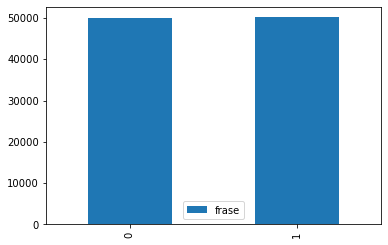

In [6]:
df.groupby('label').agg({'frase': 'count'}).reset_index(drop=True).plot(kind='bar')

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# pré-processamento das frases
df['frase_processada'] = df['frase'].apply(text_cleaning_l)

# vetorização das frases
vectorizer = CountVectorizer(tokenizer=lambda text: text, lowercase=False)
X = vectorizer.fit_transform(df['frase_processada'].apply(lambda tokens: ' '.join(tokens)))

# divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.3, random_state=42)

# criação do modelo de regressão logística e treinamento
lr = LogisticRegression()
lr.fit(X_train, y_train)

# avaliação do modelo nos dados de teste
y_pred = lr.predict(X_test)

# avaliando o modelo
from sklearn.metrics import accuracy_score, precision_score
print("Acurácia da classificação:", accuracy_score(y_test, y_pred))
print("Precisão da classificação:", precision_score(y_test, y_pred, pos_label='positivo'))

Acurácia da classificação: 0.5006333333333334
Precisão da classificação: 0.5049816115011702


In [8]:
# Mesmo exemplo mas com o TF-IDF como vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# pré-processamento das frases
df['frase_processada'] = df['frase'].apply(text_cleaning_l)

# vetorização das frases
vectorizer = TfidfVectorizer(tokenizer=lambda text: text, lowercase=False)
X = vectorizer.fit_transform(df['frase_processada'].apply(lambda tokens: ' '.join(tokens)))

# divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.3, random_state=42)

# criação do modelo de regressão logística e treinamento
lr = LogisticRegression()
lr.fit(X_train, y_train)

# avaliação do modelo nos dados de teste
y_pred = lr.predict(X_test)

# avaliando o modelo
from sklearn.metrics import accuracy_score, precision_score
print("Acurácia da classificação:", accuracy_score(y_test, y_pred))
print("Precisão da classificação:", precision_score(y_test, y_pred, pos_label='positivo'))

Acurácia da classificação: 0.5006333333333334
Precisão da classificação: 0.5049816115011702


## Logistic Regression Cost Function

A função de custo da regressão logística é usada para avaliar quão bem um modelo de regressão logística está performando em relação aos dados observados. Ela é frequentemente utilizada em problemas de classificação binária, onde o objetivo é prever se uma observação pertence a uma das duas classes possíveis. Aqui está uma explicação de cada etapa da função de custo da regressão logística:

1. **Hipótese da Regressão Logística:**
   A primeira etapa é a formulação da hipótese do modelo de regressão logística. A hipótese é uma função que mapeia as entradas para uma probabilidade estimada de pertencer a uma das classes. A função logística (também conhecida como função sigmoide) é comumente utilizada como a função de hipótese na regressão logística e é dada pela seguinte equação:

   $$ h_{\theta}(x) = \frac{1}{1 + e^{-\theta^Tx}}$$

   Onde:
   - $ h_{\theta}(x) $ é a estimativa da probabilidade de \( x \) pertencer à classe positiva,
   - $ \theta $ são os parâmetros do modelo,
   - $ x $ é o vetor de entrada,
   - $ e $ é o número de Euler (aproximadamente 2.71828).


2. **Função de Custo Logístico:**
   A função de custo é uma medida de quão bem a hipótese do modelo se ajusta aos dados observados. Para a regressão logística, a função de custo (também conhecida como função de perda ou função de erro) é definida usando a técnica de máxima verossimilhança. A função de custo logístico para um único exemplo de treinamento é dada pela seguinte equação:

   $$ J(\theta) = -y \log(h_{\theta}(x)) - (1 - y) \log(1 - h_{\theta}(x)) $$

   Onde:
   - $ J(\theta) $ é a função de custo,
   - $ y $ é a classe verdadeira do exemplo (0 ou 1),
   - $ h_{\theta}(x) $ é a estimativa da probabilidade da classe positiva dada pela hipótese.


3. **Função de Custo Médio (ou Função de Custo Regularizada):**
   Para avaliar o desempenho do modelo em todo o conjunto de dados, a função de custo médio é calculada. Isso é feito tirando a média dos custos individuais de todos os exemplos de treinamento. Além disso, uma penalidade de regularização pode ser adicionada para evitar overfitting. A função de custo médio (ou função de custo regularizada) é dada pela seguinte equação:

   $$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y^{(i)} \log(h_{\theta}(x^{(i)})) - (1 - y^{(i)}) \log(1 - h_{\theta}(x^{(i)}))] + \frac{\lambda}{2m} \sum_{j=1}^{n} \theta_j^2 $$

   Onde:
   - $ m $ é o número total de exemplos de treinamento,
   - $ n $ é o número de características,
   - $ \lambda $ é o parâmetro de regularização,
   - $ \theta_j $ é o j-ésimo parâmetro do modelo.

# Week 2 - Sentiment Analysis with Naive Bayes

## Recaptulando...

1. **Probabilidade:**
   A probabilidade é uma medida numérica que quantifica a incerteza associada a um evento. Em termos simples, é a chance de que algo aconteça. A probabilidade de um evento é sempre um número entre 0 e 1, onde 0 indica impossibilidade absoluta do evento ocorrer e 1 indica certeza absoluta de que o evento ocorrerá.
   
<img src="./imgs/prob_positive_tweet.png">
<img src="./imgs/prob_positive_tweet2.png">

2. **Probabilidade Condicional:**
   A probabilidade condicional é a probabilidade de um evento ocorrer dado que outro evento já ocorreu. É denotada por $ P(A|B) $, que lê-se como "a probabilidade de A dado B". A fórmula para calcular a probabilidade condicional é:

   $$ P(A|B) = \frac{P(A \cap B)}{P(B)} $$

   Onde:
   - $ P(A|B) $ é a probabilidade de A dado B,
   - $ P(A \cap B) $ é a probabilidade da interseção de A e B,
   - $ P(B) $ é a probabilidade de B.

   Em palavras simples, a probabilidade condicional é a proporção de vezes que o evento A ocorre quando o evento B ocorre.

<img src="./imgs/conditional_prob_tweet.png">


3. **Regra de Bayes:**
   A regra de Bayes é uma ferramenta fundamental na teoria das probabilidades que permite atualizar as probabilidades de uma hipótese à luz de novas evidências. Formalmente, a regra de Bayes é expressa como:

   $ P(A|B) = \frac{P(B|A) \cdot P(A)}{P(B)} $

   Onde:
   - $ P(A|B) $ é a probabilidade de A dado B (posterior),
   - $ P(B|A) $ é a probabilidade de B dado A (likelihood),
   - $ P(A) $ é a probabilidade de A (prior),
   - $ P(B) $ é a probabilidade de B.

   A regra de Bayes nos permite calcular a probabilidade de uma hipótese (A) ser verdadeira dada uma evidência observada (B), usando a probabilidade da evidência dada a hipótese (likelihood), a probabilidade a priori da hipótese e a probabilidade marginal da evidência.A diferença principal entre a probabilidade condicional e a regra de Bayes é que a probabilidade condicional é uma medida da probabilidade de um evento ocorrer dado que outro evento já ocorreu, enquanto a regra de Bayes é uma ferramenta para atualizar a probabilidade de uma hipótese à luz de novas evidências. A regra de Bayes utiliza a probabilidade condicional como um de seus componentes para calcular a probabilidade posterior.

<img src="./imgs/bayes_rule_tweet.png">

A probabilidade é a chance de um evento ocorrer, a probabilidade condicional é a probabilidade de um evento ocorrer dado que outro evento já ocorreu, e a regra de Bayes é uma ferramenta para atualizar a probabilidade de uma hipótese à luz de novas evidências.

## Naive Bayes

O algoritmo Naive Bayes é um método de classificação probabilístico baseado no teorema de Bayes, com uma suposição "ingênua" de independência condicional entre os recursos.

1. **Suposição de Independência Condicional:**
   A primeira etapa do algoritmo Naive Bayes é a suposição de independência condicional entre os recursos. Isso significa que assumimos que os recursos são independentes entre si, dado o valor da variável de classe. Apesar de ser uma suposição forte e muitas vezes não ser verdadeira na prática, ela simplifica os cálculos e torna o algoritmo computacionalmente eficiente.

2. **Construção do Modelo de Probabilidade:**
   O próximo passo é construir o modelo de probabilidade. Isso envolve calcular a probabilidade de cada classe e a probabilidade de cada valor do recurso dado cada classe. Em outras palavras, para cada classe, calculamos a probabilidade a priori da classe ( $ P(C_k) $ ) e a probabilidade de cada recurso ( $ P(X_i | C_k) $ ).

3. **Classificação:**
   Depois que o modelo de probabilidade é construído, podemos usá-lo para fazer previsões sobre novos exemplos. Dada uma nova instância com valores de recursos $ x_1, x_2, ..., x_n $, queremos calcular a probabilidade de pertencer a cada classe e, em seguida, atribuir a classe com a maior probabilidade como a classe prevista para a instância. Isso é feito usando o teorema de Bayes:

   $$ P(C_k | x_1, x_2, ..., x_n) = \frac{P(C_k) \cdot \prod_{i=1}^{n} P(x_i | C_k)}{P(x_1, x_2, ..., x_n)} $$

   Onde:
   - $ P(C_k | x_1, x_2, ..., x_n) $ é a probabilidade da classe $ C_k $ dado os valores dos recursos,
   - $ P(C_k) $ é a probabilidade a priori da classe $ C_k $,
   - $ P(x_i | C_k) $ é a probabilidade de cada valor do recurso dado a classe $ C_k $,
   - $ P(x_1, x_2, ..., x_n) $ é a probabilidade dos valores dos recursos.

4. **Estimação de Parâmetros:**
   Durante a etapa de construção do modelo, precisamos estimar os parâmetros do modelo, ou seja, as probabilidades a priori das classes e as probabilidades condicionais dos recursos para cada classe. Isso geralmente é feito usando técnicas como a frequência relativa de ocorrência dos dados de treinamento.

5. **Suavização de Laplace (Opcional):**
   Em alguns casos, para evitar probabilidades condicionais iguais a zero para recursos não observados em uma classe particular, pode ser aplicada a suavização de Laplace, adicionando uma pequena quantidade aos contadores de frequência de cada valor de recurso para cada classe durante a estimativa dos parâmetros.

Essas são as etapas principais da função do algoritmo Naive Bayes, desde a suposição de independência condicional até a classificação de novas instâncias usando o teorema de Bayes.

# Week 3

# Week 4